In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [3]:
lamb = 0.01
lr = 0.001

In [10]:
def ds_4():
  n = 200
  x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
  y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:, 1] + 0.5 + 0.5 * np.random.randn(n)) > 0
  y_d4 = 2 * y_d4 - 1
  return x_d4, y_d4

def J(w,x,y):
  reg = lamb * np.dot(w.T, w)
  cost = 0
  for i in range(x.shape[0]):
    cost += np.log(1 + np.exp(-y[i] * np.dot(w.T, x[i])))
  return reg + cost


def grad(w,x,y):
  res = 2 * lamb * w
  for i in range(x.shape[0]):
    res += (-y[i] * x[i] * (1 - 1 / (1 + np.exp(-y[i] * np.dot(w.T, x[i])))))
  return res


def batchSteepestGradient(w,x,y):
  loss_hist_batch = []
  for _ in range(100):
    loss = J(w,x,y)
    g = grad(w,x,y)
    w -= g * lr
    loss_hist_batch.append(loss)
  return loss_hist_batch

def get_h(w,x,y):
  res = 2 * lamb * np.eye(4)
  for i in range(x.shape[0]):
    e = np.exp(-y[i] * np.dot(w.T, x[i]))
    res += y[i]**2 * e / (1 + e)**2 * np.dot(x[i], x[i].T)
  return res

def newton(w,x,y):
  loss_list = []
  for _ in range(100):
    loss = J(w,x,y)
    g = grad(w,x,y)
    h = get_h(w,x,y)
    w -= lr * np.dot(np.linalg.inv(h), g)
    loss_list.append(loss)
  return loss_list

def problem_1(x, y):
  w = np.random.rand(4)
  wcopy = np.copy(w)
  loss_hist_batch = batchSteepestGradient(w,x,y)
  loss_newton_batch = newton(wcopy,x,y)
  best = loss_newton_batch[-1] if loss_newton_batch[-1] < loss_hist_batch[
      -1] else loss_hist_batch[-1]

  lh = loss_hist_batch - best
  ln = loss_newton_batch - best

  log_lh = [math.log10(l) for l in lh[:-30]]
  log_ln = [math.log10(l) for l in ln[:-30]]

  plt.plot(log_ln, label="Newton Based Method")
  plt.plot(log_lh, label="Batch Steepest Gradient Method (lr = 0.001)")
  plt.ylabel("log10|J(w) - J(w(ite = 100))|")
  plt.xlabel("iteration")
  plt.legend()
  plt.show()

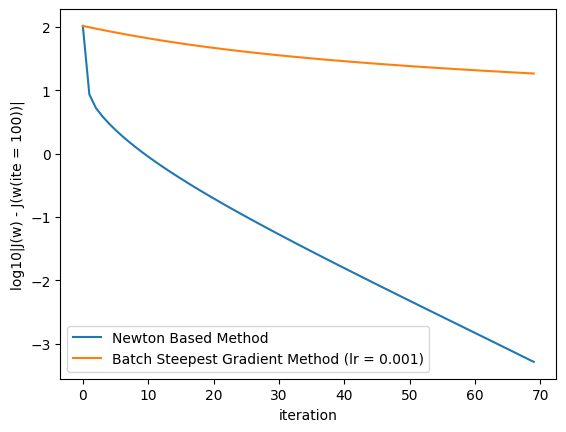

In [12]:
x, y = ds_4()
problem_1(x, y)